# Titanic Data set

The titanic dataset has data on the passengers of the Titanic catastrophe and whether they had survived the event or not. We have 2 sets of data: a training set and a testing set.

These are the columns of the dataset:

- PassengerId: Passenger ID
- Pclass: Passenger Class
- Name: Name of passenger
- Sex: Sex of passenger
- Age: Age of passenger
- SibSp: Number of Siblings/Spouses of the passenger aboard
- Parch Number: of Parents/Children of the passenger aboard
- Ticket: Ticket Number
- Fare: Passenger Fare
- Cabin: Cabin
- Embarked: Port of Embarkation

The goal is to predict whether a passenger has survived or not


## 1- Import Libraries

We first import a list of libraries we will be using

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
import Directory
import transformation
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Ignore warnings

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## 2- Load the Data

We load the titanic data from csv files.

In [3]:
titanicTrain = pd.read_csv(os.path.join(Directory.dataPath,'train.csv'))
X_test = pd.read_csv(os.path.join(Directory.dataPath,'test.csv'))

## 3- EDA

Check to see what the titanic dataset looks like

In [4]:
titanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Create a dataframe for EDA purposes
titanicEDA =titanicTrain.copy()

Check to see whether there are any correlations in the data. We can see that there are indeed some correlations. For example the Survived flag is correlated with Pclass and Fare

In [7]:
titanicEDA.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Check if there are any missing data and if so roughly how much

<AxesSubplot:>

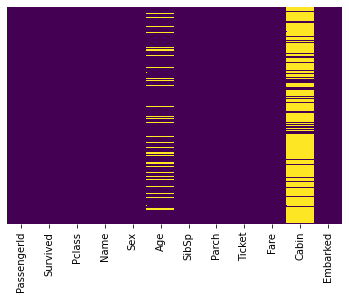

In [8]:
sns.heatmap(titanicEDA.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The test data is similar to the training data in that there are similar amounts of missing data

<AxesSubplot:>

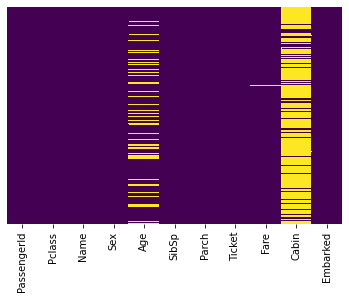

In [9]:
sns.heatmap(X_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
print("Percentage of Age == NaN values: ", 100*np.size(titanicEDA[pd.isnull(titanicEDA['Age'])]['Age'])/np.size(titanicEDA['Age']))
print("Percentage of Age == NaN values: ", 100*np.sum(pd.isnull(titanicEDA['Age']))/np.size(titanicEDA['Age']))
print("Percentage of Age == NaN values: ", 100*(1- titanicEDA['Age'].count()/np.size(titanicEDA['Age'])))

print("Percentage of Cabin == NaN values: ", 100*np.size(titanicEDA[pd.isnull(titanicEDA['Cabin'])]['Cabin'])/np.size(titanicEDA['Cabin']))
print("Percentage of Cabin == NaN values: ", 100*np.sum(pd.isnull(titanicEDA['Cabin']))/np.size(titanicEDA['Cabin']))
print("Percentage of Cabin == NaN values: ", 100*(1- titanicEDA['Cabin'].count()/np.size(titanicEDA['Cabin'])))

Percentage of Age == NaN values:  19.865319865319865
Percentage of Age == NaN values:  19.865319865319865
Percentage of Age == NaN values:  19.865319865319865
Percentage of Cabin == NaN values:  77.10437710437711
Percentage of Cabin == NaN values:  77.10437710437711
Percentage of Cabin == NaN values:  77.1043771043771


A big proportion of Cabin data is missing. Let's have a quick glance at some of the fields and their distributions

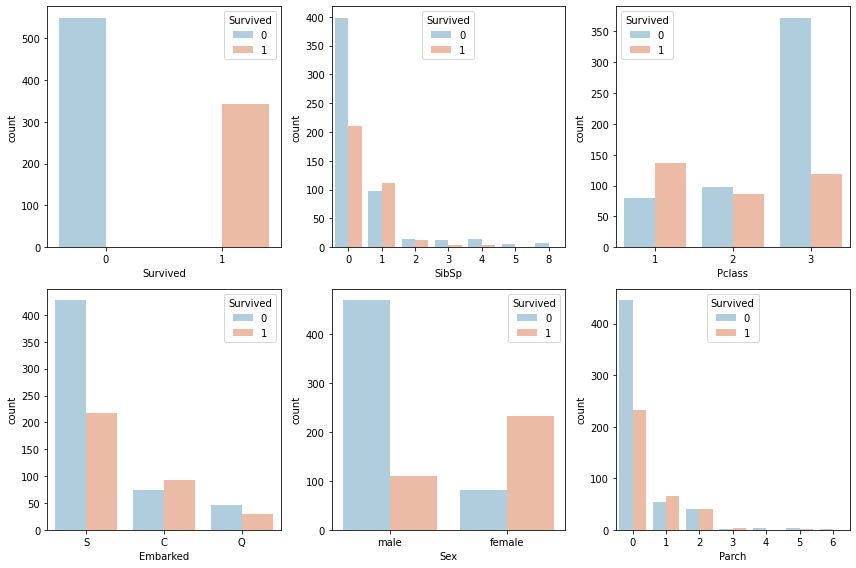

In [11]:
# The fields we want to look at
fields = ['Survived','SibSp','Pclass','Embarked','Sex','Parch']

nrows = 2
ncols = int(len(fields)/nrows)

fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols*4,nrows*4))

for row in range(0,nrows):
    for col in range(0,ncols):
        thisAxis = ax[row][col]
        field = row*ncols + col
        if field >= len(fields):
            continue
        sns.countplot(x=fields[field],hue=fields[0],data=titanicEDA,palette='RdBu_r',ax=thisAxis)
        
plt.tight_layout()   

We can obtain the following information from the above plots:

- More people died than survived
- Those in Pclass=3 had a much higher proportion of deaths
- Those that had Embarked = 'S' had a much greater death proportion
- Parch is a great indicator of whether the person has survived since a greater portion of those with Parch 0 died
- Women were much more likely to survive than men
- Parch is closely related to SibSp, both in meaning and in it's relation to survival

Outcome for the model:

- Add Pclass as a predictor
- Add Embarked as a predictor
- Add Parch and SibSp as a predictor (TotalPpl = Parch + SibSp)
- Add Sex as a predictor


Next, we check the distributions of some of the other fields

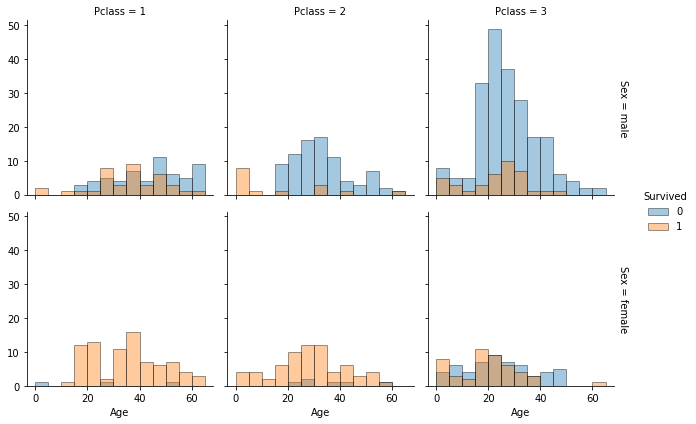

In [12]:
g = sns.FacetGrid(data=titanicEDA,row='Sex',col='Pclass',hue='Survived',margin_titles=True)

g.map(sns.distplot, 'Age', kde=False,bins=np.arange(0,70,5),hist_kws=dict(edgecolor='black'))

g.add_legend() 

plt.show()  

We can see from the above distributions that:

- Males had best survival rates in Pclass 1
- Females had best survival rates in Pclass 1 and 2
- For females, being very young in Pclass 1 meant you had greater chance of death. While being in Pclass 2 meant greater chance of survival

Outcome for the model:

- Add Age as a predictor

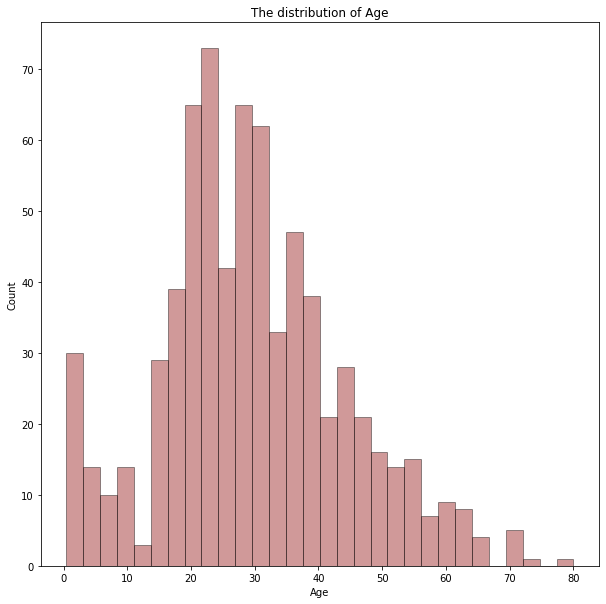

In [13]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

ax.set_ylabel('Count')
ax.set_title('The distribution of Age')

g = sns.distplot(titanicEDA['Age'].dropna(),kde=False,color='darkred',bins=30,hist_kws=dict(edgecolor='black'),ax=ax)

We can see that the distribution of Age is slightly bimodal. We have a small peak for the much younger age groups. Could possibly be due newly weds taking their young children along with them. Or it may be due to a very young child is pretty dependent and more difficult to leave in the care of another. Whatever the reason, we can see in the above Age distribution plot against survival that apart from a small anomaly in the female Pclass=1 subclass, very young children have pretty good survival rates compared to other age groups.

Let's have a look at similar information for Fare

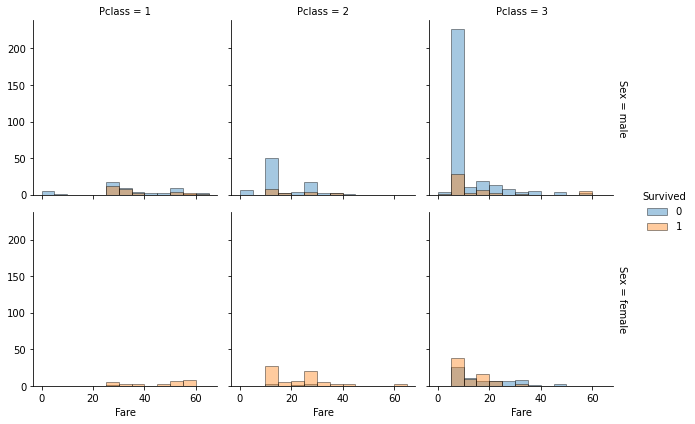

In [14]:
g = sns.FacetGrid(data=titanicEDA,row='Sex',col='Pclass',hue='Survived',margin_titles=True)

g.map(sns.distplot, 'Fare', kde=False,bins=np.arange(0,70,5),hist_kws=dict(edgecolor='black'))

g.add_legend() 

plt.show()  

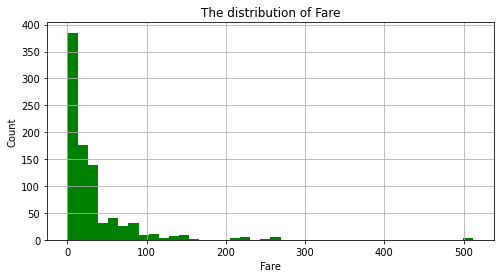

In [15]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

ax.set_ylabel('Count')
ax.set_xlabel('Fare')
ax.set_title('The distribution of Fare')

g = titanicEDA['Fare'].hist(color='green',bins=40,figsize=(8,4))

Fare is highly left skewed. It is clear that Pclass 3 and low fares had atrocious survival rates. We can ignore this class so that we can get a better look at the other classes below 

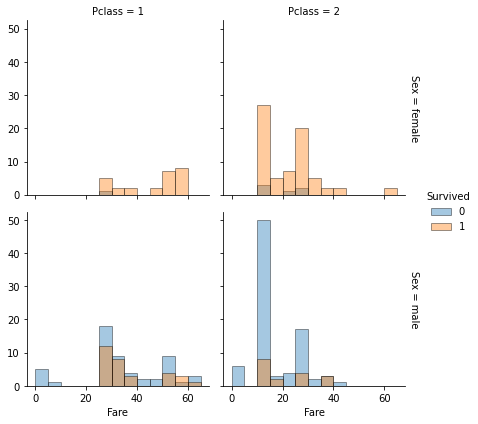

In [16]:
g = sns.FacetGrid(data=titanicEDA[titanicEDA['Pclass'] < 3],row='Sex',col='Pclass',hue='Survived',margin_titles=True)

g.map(sns.distplot, 'Fare', kde=False,bins=np.arange(0,70,5),hist_kws=dict(edgecolor='black'))

g.add_legend() 

plt.show()  

Looking further, we can see that a lower fare corresponds to a lower survival rate.

Let's create a TotalPpl column and see how that correlates with survival

In [17]:
titanicEDA['TotalPpl'] = titanicEDA['Parch'] + titanicEDA['SibSp']

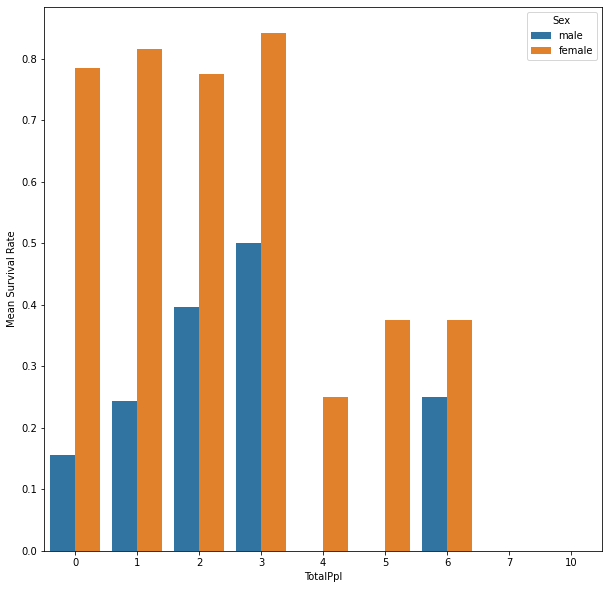

In [18]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.barplot(x='TotalPpl',y='Survived',hue='Sex',data=titanicEDA,ci=0)

ax.set_ylabel('Mean Survival Rate')

plt.show()

In [19]:
titanicEDA['IsChild'] = titanicEDA['Age'].apply(lambda x: 1 if x < 16 else 0)

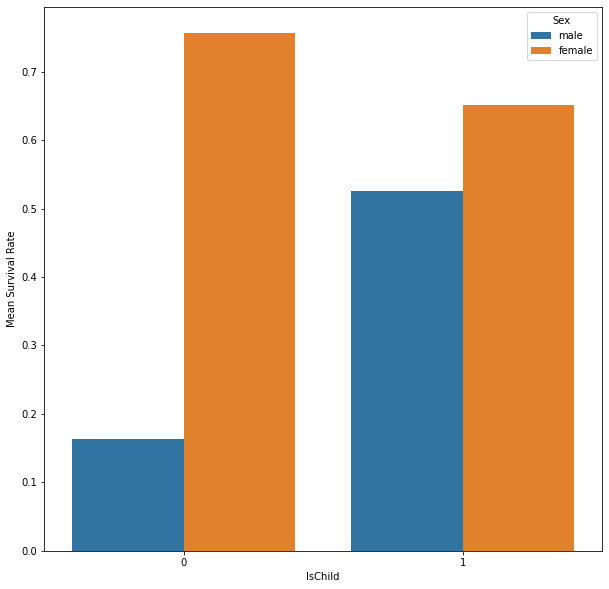

In [20]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.barplot(x='IsChild',y='Survived',hue='Sex',data=titanicEDA,ci=0)

ax.set_ylabel('Mean Survival Rate')

plt.show()

When viewed all together, it looks like there is no relationship between TotalPpl and Survival. However, looking at this data split by gender shows that as the size of a passengers family increases toward 3, male passenger survival rates increase while female passenger survival rates remain constant. Increasing the family size further dramatically decreases survival rates.

Next, let's look at passenger titles to see if there is any insight there.

In [21]:
# Add the title from the name
transformation.addTitle(titanicEDA)

dic_OrigMap = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master':'Master','Don':'Don','Rev':'Rev',
    'Mme':'Mme',
    'Ms':'Ms','Major':'Major', 'Lady':'Lady', 'Sir':'Sir', 'Mlle':'Mlle', 
    'Col':'Col', 'Capt':'Capt', 'Countess':'Countess','Jonkheer':'Jonkheer', 'Dr':'Dr', 'Dona':'Dona'}

dic_Map = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master':'Master','Don':'Mr','Rev':'Rev',
    'Mme':'Mrs',
    'Ms':'Ms','Major':'Mr', 'Lady':'Mrs', 'Sir':'Master', 'Mlle':'Miss', 
    'Col':'Col', 'Capt':'Rev', 'Countess':'Mrs','Jonkheer':'Master', 'Dr':'Dr', 'Dona':'Mrs'}

titanicEDA['Title'] = titanicEDA['Title'].map(dic_Map)

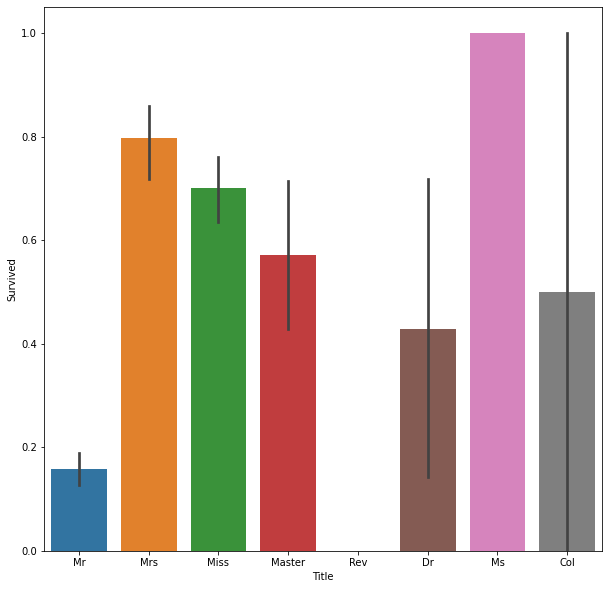

In [22]:
fig,ax = plt.subplots()
sns.barplot(x='Title',y='Survived',data=titanicEDA)
fig.set_size_inches(10,10)

The test set has the following titles:

'Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'

In [23]:
# titanicTestCleaned = fillTitanicNa(test,True,True)
# titanicTestCleaned.drop('PassengerId',inplace=True,axis=1)
# titanicTestCleaned.head()
# test['Title'].unique()

In [24]:
# Add a ticket bucket
transformation.addTicketBucket(titanicEDA)

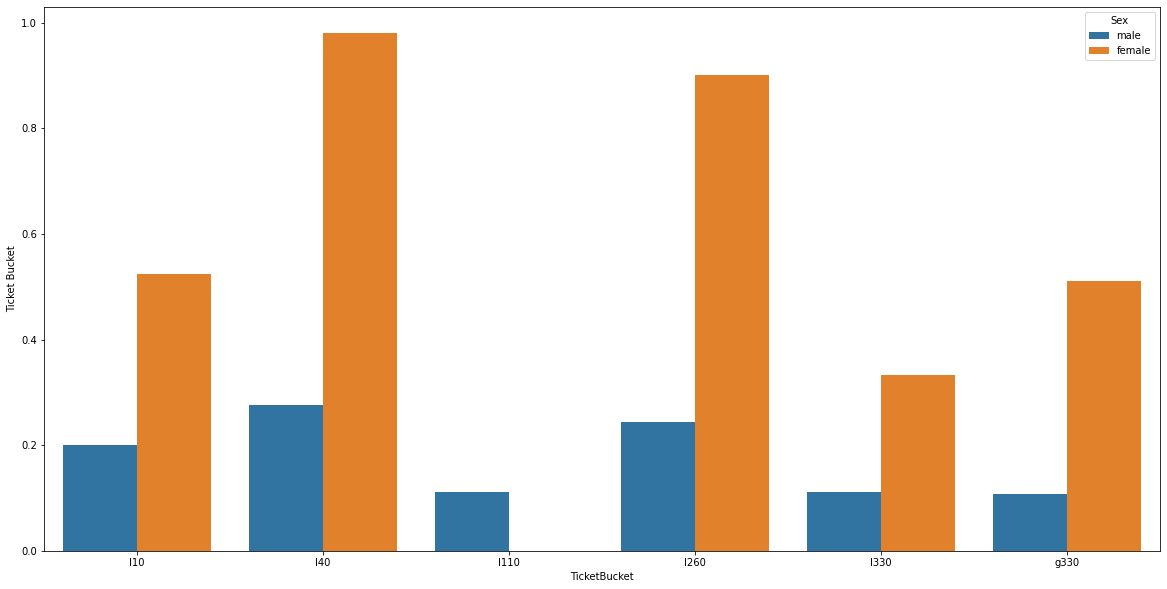

In [25]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,10))

sns.barplot(x='TicketBucket',y='Survived',hue='Sex',data=titanicEDA,ci=0,order=['l10','l40','l110','l260','l330','g330'])

ax.set_ylabel('Ticket Bucket')

plt.show()

How about the name length?

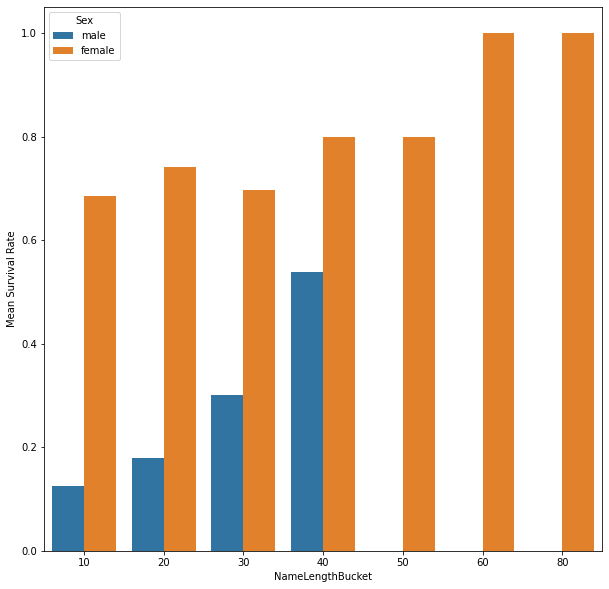

In [26]:
# Get the name lenth and bucket it
transformation.addNameLength(titanicEDA)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.barplot(x='NameLengthBucket',y='Survived',hue='Sex',data=titanicEDA,ci=0)

ax.set_ylabel('Mean Survival Rate')

plt.show()

In [27]:
titanicEDA[['Survived','NameLengthBucket']].corr()

,Survived,NameLengthBucket
Survived,1.000000,0.327466
NameLengthBucket,0.327466,1.000000


In the above plot, we can see that a longer name corresponds to greater survival rate. We can also see from the above output that the name length is correlated with survival.
 
 Outcome for the model:
 
 - Add Title to the model
 - Add name length to the model
 
Next let's look at whether we can see anything interesting with the Cabin variable

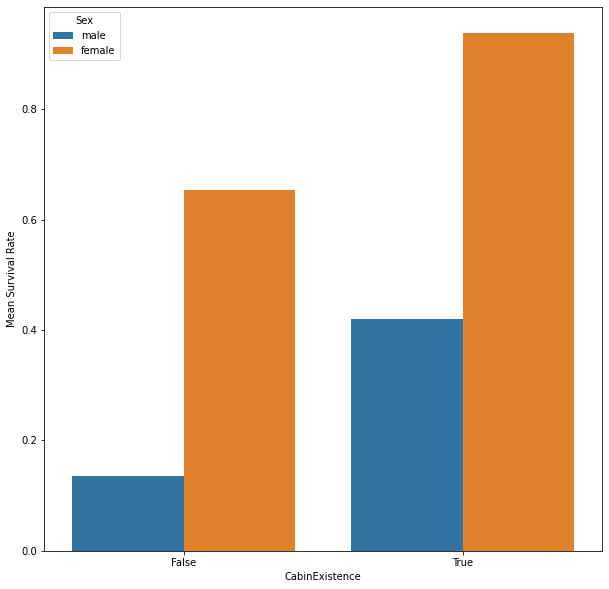

In [28]:
#Cabin either exists or doesn't -> 1 or 0
transformation.addCabinExists(titanicEDA)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.barplot(x='CabinExistence',y='Survived',hue='Sex',data=titanicEDA,ci=0)

ax.set_ylabel('Mean Survival Rate')

plt.show()

We can see that whether a cabin entry exists for a passenger gives us information about the survival rate for both genders.

Let's see if we can go further than this, for those that have a cabin entry, would the first letter of the cabin ID give us any further information?

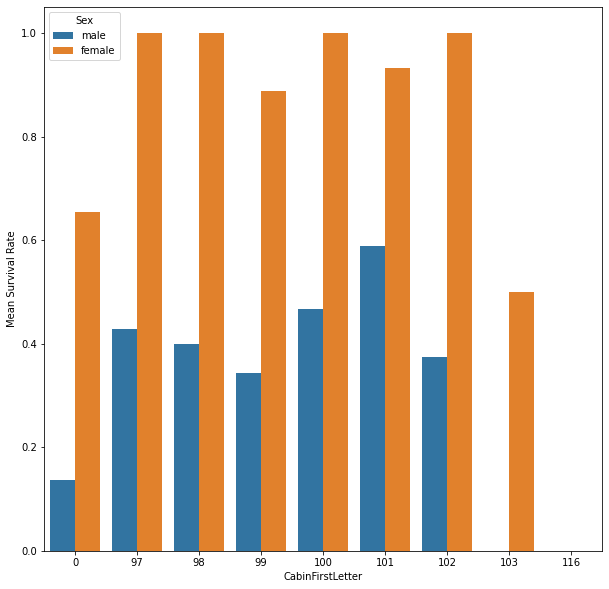

In [29]:
#Cabin first letter
transformation.addCabinFirstLetter(titanicEDA)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.barplot(x='CabinFirstLetter',y='Survived',hue='Sex',data=titanicEDA,ci=0)

ax.set_ylabel('Mean Survival Rate')

plt.show()

There doesn't seem to be anything we can obtain from the first letter of the cabin. How about the cabin name length?

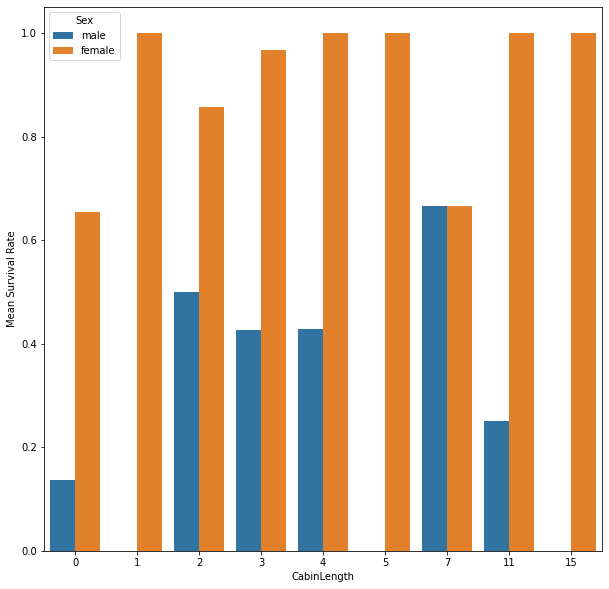

In [30]:
#Cabin first letter
transformation.addCabinLength(titanicEDA)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.barplot(x='CabinLength',y='Survived',hue='Sex',data=titanicEDA,ci=0)

ax.set_ylabel('Mean Survival Rate')

plt.show()

Cabin name length also doesn't seem to give us more information so we'll stick with cabin existence

Outcome for the model:
 
 - Add Cabin existence to the model

## 4- Transformation and Cleaning

As seen above, there is some missing data for Age. Also, the test data may have missing Fare. One way we can cater for this is to fill the missing Age with the mean of the Age for that sex and Pclass. We can do this in the below set of functions as well as do some cleaning and transformations we've identified above

Below, we will populate 'NA' values for fare and age with their corresponding mean values within their classes.

In [31]:
#We will put this block into a function below
t_Fare = pd.DataFrame(transformation.cleanTitanicData(titanicTrain).dropna().groupby(['Pclass','male','TotalPpl']).median()['Fare'])
t_Fare = pd.DataFrame(t_Fare.to_records())

t_Age = pd.DataFrame(transformation.cleanTitanicData(titanicTrain).dropna().groupby(['Pclass','male','TotalPpl']).median()['Age'])
t_Age = pd.DataFrame(t_Age.to_records())

print('Mean Fare per grouping \n',t_Fare,'\n\n')
print('Mean Age per grouping \n',t_Age)

Mean Fare per grouping 
     Pclass  male  TotalPpl       Fare
0        1     0         0   81.57915
1        1     0         1   77.95830
2        1     0         2   79.65000
3        1     0         3  135.77500
4        1     0         4  262.37500
5        1     0         5  263.00000
6        1     1         0   30.00000
7        1     1         1   63.35830
8        1     1         2   90.00000
9        1     1         3  120.00000
10       1     1         5  263.00000
11       2     0         0   13.00000
12       2     0         1   26.00000
13       2     0         2   26.25000
14       2     0         3   39.00000
15       2     0         4   23.00000
16       2     0         5   18.75000
17       2     1         0   13.00000
18       2     1         1   26.00000
19       2     1         2   29.00000
20       2     1         3   33.37500
21       3     0         0    7.85420
22       3     0         1   13.41670
23       3     0         2   16.70000
24       3     0         

We can create 2 functions to deal with this assignment of null values

Now we can create a cleaned dataframe to check for it's validity, i.e. we will check for any missing values and whether the above works as intended

In [32]:
titanicCleaned = titanicTrain.copy()
titanicCleaned = transformation.fillTitanicNa(titanicCleaned,titanicCleaned,True,True)

In [33]:
#titanicCleaned[['Survived','NameLengthBucket']].corr()

In [34]:
titanicCleaned.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinExistence,CabinCount,male,...,Miss,Mr,Mrs,Ms,Rev,Sir,TotalPpl,IsChild,IsOAP,IsZeroFare
0,1,0,3,22,1,0,7.2500,False,1,1,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,38,1,0,71.2833,True,1,0,...,0,0,1,0,0,0,1,0,0,0
2,3,1,3,26,0,0,7.9250,False,1,0,...,1,0,0,0,0,0,0,0,0,0
3,4,1,1,35,1,0,53.1000,True,1,0,...,0,0,1,0,0,0,1,0,0,0
4,5,0,3,35,0,0,8.0500,False,1,1,...,0,1,0,0,0,0,0,0,0,0


Check that there are no missing values

In [35]:
titanicCleaned.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
CabinExistence    0
CabinCount        0
male              0
Q                 0
S                 0
Dr                0
Master            0
Miss              0
Mr                0
Mrs               0
Ms                0
Rev               0
Sir               0
TotalPpl          0
IsChild           0
IsOAP             0
IsZeroFare        0
dtype: int64

In [36]:
titanicCleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinCount,male,Q,...,Miss,Mr,Mrs,Ms,Rev,Sir,TotalPpl,IsChild,IsOAP,IsZeroFare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.335578,0.523008,0.381594,32.204208,1.038159,0.647587,0.086420,...,0.206510,0.584736,0.143659,0.001122,0.006734,0.002245,0.904602,0.099888,0.029181,0.016835
std,257.353842,0.486592,0.836071,13.451480,1.102743,0.806057,49.693429,0.252410,0.477990,0.281141,...,0.405028,0.493044,0.350940,0.033501,0.081830,0.047351,1.613459,0.300019,0.168407,0.128725
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000


In [37]:
titanicCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    int64  
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   CabinExistence  891 non-null    bool   
 8   CabinCount      891 non-null    int64  
 9   male            891 non-null    uint8  
 10  Q               891 non-null    uint8  
 11  S               891 non-null    uint8  
 12  Dr              891 non-null    uint8  
 13  Master          891 non-null    uint8  
 14  Miss            891 non-null    uint8  
 15  Mr              891 non-null    uint8  
 16  Mrs             891 non-null    uint8  
 17  Ms              891 non-null    uin

It looks like the cleaned data is as expected. We can now move on to modelling and prediction.

## 4- Prediction

### A- Logistic Regression

Import the necessary libraries

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

Get our training data and our test data for seeing if the model works well. We can use cross_val_score to do our train test split.

In [39]:
# This is the features data from the training set without the PassengerId
X = titanicCleaned.drop(['Survived','PassengerId'],axis=1)

# This is the response variable from the training set
y = titanicCleaned['Survived']

# This is the test data including the PassengerId
test = pd.read_csv(os.path.join(Directory.dataPath,'test.csv'))

# This is the test data without the PassengerId
test2 = test.drop(['PassengerId'],axis=1)

Fit a logistic regression model to the data with cross validation and GridSearchCV. GridSearchCV, runs the model for all the specified parameters and picks the best performing one.

In [40]:
# The parameters of the Logistic Regression model which we want to iterate over
param_grid = {'penalty':['l2'], 'solver':['liblinear','newton-cg', 'lbfgs', 'sag', 'saga'],\
              'C':[100,20,10,2,1,0.1,0.01,0.002,0.001,0.0009],\
              'fit_intercept':[True,False]}

# Utilise GridSearchCV to run Linear Regression where for each set of parameters it will run cross validation 20 times.
# n_jobs is the number of parallel jobs
lg_search = GridSearchCV(LogisticRegression(), param_grid, cv=10, refit=True, verbose=1,n_jobs=4)
lg_search.fit(X,y)
lg_search.best_estimator_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   15.6s finished


LogisticRegression(C=2, solver='newton-cg')

We can check if these set of parameters do indeed maximise the accuracy of the model for this data

In [41]:
# Default classifier
lg1 = LogisticRegression()

# Optimised classifier
lg2 = lg_search.best_estimator_

# Here we run cross validation for the default model and the optimised model. We run it 200 times
# with a randomised train and test set and get the mean accuracy score
lg1_scores = cross_val_score(lg1, X, y, cv=10, scoring='accuracy',n_jobs=4)
lg2_scores = cross_val_score(lg2, X, y, cv=10, scoring='accuracy',n_jobs=4)
print('The default classifier accuracy score is {}'.format(lg1_scores.mean()))
print('The optimised classifier accuracy score is {}'.format(lg2_scores.mean()))

The default classifier accuracy score is 0.8293882646691635
The optimised classifier accuracy score is 0.8304993757802747


In [42]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,CabinExistence,CabinCount,male,Q,S,...,Miss,Mr,Mrs,Ms,Rev,Sir,TotalPpl,IsChild,IsOAP,IsZeroFare
0,3,22,1,0,7.2500,False,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0
1,1,38,1,0,71.2833,True,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,3,26,0,0,7.9250,False,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,35,1,0,53.1000,True,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,3,35,0,0,8.0500,False,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In the end it did ok, even the default set up. Now we train with the whole data set using the parameters of the best model above

In [43]:
lg2.fit(X, y)

LogisticRegression(C=2, solver='newton-cg')

In [44]:
# Save the model
pkl_filename = os.path.join(Directory.modelsPath,"LogisticRegression.pkl")
with open(pkl_filename, 'wb') as file:
    pickle.dump(lg2, file)

In [45]:
# Load the model
with open(pkl_filename, 'rb') as file:
    lg2 = pickle.load(file)

Clean and fill the test data the same way we did the train data

In [46]:
titanicTestCleaned = transformation.fillTitanicNa(test,titanicTrain.copy(),True,True)
titanicTestCleaned.drop('PassengerId',inplace=True,axis=1)
transformation.makeColumnsEqual(titanicTestCleaned,X)
titanicTestCleaned.head()

Added col Sir


,Pclass,Age,SibSp,Parch,Fare,CabinExistence,CabinCount,male,Q,S,...,Miss,Mr,Mrs,Ms,Rev,TotalPpl,IsChild,IsOAP,IsZeroFare,Sir
0,3,34,0,0,7.8292,False,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,3,47,1,0,7.0000,False,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,2,62,0,0,9.6875,False,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
3,3,27,0,0,8.6625,False,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,3,22,1,1,12.2875,False,1,0,0,1,...,0,0,1,0,0,2,0,0,0,0


In [47]:
titanicCleaned.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinExistence,CabinCount,male,...,Miss,Mr,Mrs,Ms,Rev,Sir,TotalPpl,IsChild,IsOAP,IsZeroFare
0,1,0,3,22,1,0,7.2500,False,1,1,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,38,1,0,71.2833,True,1,0,...,0,0,1,0,0,0,1,0,0,0
2,3,1,3,26,0,0,7.9250,False,1,0,...,1,0,0,0,0,0,0,0,0,0
3,4,1,1,35,1,0,53.1000,True,1,0,...,0,0,1,0,0,0,1,0,0,0
4,5,0,3,35,0,0,8.0500,False,1,1,...,0,1,0,0,0,0,0,0,0,0


Check that no data is missing

<AxesSubplot:>

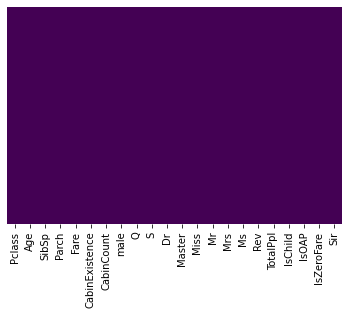

In [48]:
sns.heatmap(titanicTestCleaned.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Make sure we haven't lost any rows

In [49]:
print(titanicTestCleaned.shape)

(418, 22)


Now we predict. Below, we use the optimised Logistic Regression, lg2, to predict the response variable in the test data.

In [50]:
# lg2 was already fitted above. Now we use it to predict
predictions = lg2.predict(titanicTestCleaned)

# Convert it to a dataframe
df_pred = pd.DataFrame(predictions,columns=['Survived'])
df_pred.head()

,Survived
0,0
1,1
2,0
3,0
4,1


We need the data to be in the correct format. Namely, (PassengerId,Survived). So below, we create a function to format the predictions.

We can now format the predictions into a format where the index is PassengerId (so that when wwe save to csv that's the index) and we get another column which is Survived.

In [51]:
df_FullPred = transformation.formatTitanicPredictions2(df_pred,titanicTestCleaned,test)

df_FullPred['Survived'].head()

PassengerId
892    0
893    1
894    0
895    0
896    1
Name: Survived, dtype: int64

Below, we make sure there aren't any null information

In [52]:
df_FullPred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        418 non-null    int64  
 1   Pclass          418 non-null    int64  
 2   Age             418 non-null    int64  
 3   SibSp           418 non-null    int64  
 4   Parch           418 non-null    int64  
 5   Fare            418 non-null    float64
 6   CabinExistence  418 non-null    bool   
 7   CabinCount      418 non-null    int64  
 8   male            418 non-null    uint8  
 9   Q               418 non-null    uint8  
 10  S               418 non-null    uint8  
 11  Dr              418 non-null    uint8  
 12  Master          418 non-null    uint8  
 13  Miss            418 non-null    uint8  
 14  Mr              418 non-null    uint8  
 15  Mrs             418 non-null    uint8  
 16  Ms              418 non-null    uint8  
 17  Rev             418 non-null    

We now save the resulting predictions to a file

In [53]:
df_FullPred['Survived'].to_csv(os.path.join(Directory.outputPath,'GenderPrediction.csv'),header=True)
df_FullPred.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,CabinExistence,CabinCount,male,Q,...,Miss,Mr,Mrs,Ms,Rev,TotalPpl,IsChild,IsOAP,IsZeroFare,Sir
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7.8292,False,1,1,1,...,0,1,0,0,0,0,0,0,0,0
893,1,3,47,1,0,7.0000,False,1,0,0,...,0,0,1,0,0,1,0,0,0,0
894,0,2,62,0,0,9.6875,False,1,1,1,...,0,1,0,0,0,0,0,1,0,0
895,0,3,27,0,0,8.6625,False,1,1,0,...,0,1,0,0,0,0,0,0,0,0
896,1,3,22,1,1,12.2875,False,1,0,0,...,0,0,1,0,0,2,0,0,0,0


Now let's summarise the above actions to predict and save all in one.

In [54]:
import importlib
importlib.reload(transformation)

<module 'transformation' from 'C:\\Users\\tanse\\Documents\\MyStuff\\Temp\\Kaggle\\titanic\\Code\\transformation.py'>

Now that we have a function to do the cleaning and formating, we can train a linear regression model and pass it to the function

In [55]:
# lg2 was already trained, we use it here in the function to do the prediction
transformation.PredictAndSave2(test2,titanicTrain.copy(),X,lg2,os.path.join(Directory.outputPath,'GenderPrediction_LogisticRegression.csv'),test).head()

Added col Sir


,Survived,Pclass,Age,SibSp,Parch,Fare,CabinExistence,CabinCount,male,Q,...,Miss,Mr,Mrs,Ms,Rev,TotalPpl,IsChild,IsOAP,IsZeroFare,Sir
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7.8292,False,1,1,1,...,0,1,0,0,0,0,0,0,0,0
893,1,3,47,1,0,7.0000,False,1,0,0,...,0,0,1,0,0,1,0,0,0,0
894,0,2,62,0,0,9.6875,False,1,1,1,...,0,1,0,0,0,0,0,1,0,0
895,0,3,27,0,0,8.6625,False,1,1,0,...,0,1,0,0,0,0,0,0,0,0
896,1,3,22,1,1,12.2875,False,1,0,0,...,0,0,1,0,0,2,0,0,0,0


In [56]:
titanicCleaned = titanicTrain.copy()
titanicCleaned = transformation.fillTitanicNa(titanicCleaned,titanicCleaned,True,True)

# This is the features data from the training set without the PassengerId
X = titanicCleaned.drop(['Survived','PassengerId'],axis=1)

# This is the response variable from the training set
y = titanicCleaned['Survived']

# This is the test data including the PassengerId
test = pd.read_csv(os.path.join(Directory.dataPath,'test.csv'))

# This is the test data without the PassengerId
test2 = test.drop(['PassengerId'],axis=1)

lg2.fit(X,y)

titanicTestCleaned = transformation.fillTitanicNa(test,titanicTrain.copy(),True,True)
titanicTestCleaned.drop('PassengerId',inplace=True,axis=1)
transformation.makeColumnsEqual(titanicTestCleaned,X)

# lg2 was already trained, we use it here in the function to do the prediction
transformation.PredictAndSave2(test2,titanicTrain.copy(),X,lg2,os.path.join(Directory.outputPath,'GenderPrediction_LogisticRegression.csv'),test).head()

Added col Sir
Added col Sir


,Survived,Pclass,Age,SibSp,Parch,Fare,CabinExistence,CabinCount,male,Q,...,Miss,Mr,Mrs,Ms,Rev,TotalPpl,IsChild,IsOAP,IsZeroFare,Sir
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7.8292,False,1,1,1,...,0,1,0,0,0,0,0,0,0,0
893,1,3,47,1,0,7.0000,False,1,0,0,...,0,0,1,0,0,1,0,0,0,0
894,0,2,62,0,0,9.6875,False,1,1,1,...,0,1,0,0,0,0,0,1,0,0
895,0,3,27,0,0,8.6625,False,1,1,0,...,0,1,0,0,0,0,0,0,0,0
896,1,3,22,1,1,12.2875,False,1,0,0,...,0,0,1,0,0,2,0,0,0,0


### B- Decision Tree

Sometimes Tree Methods perform better. We can follow the steps above to optimise, train and test

In [57]:
# Import the classifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
# As before, we specify some of the parameters we want to iterate through
param_grid = {'criterion':['gini','entropy']}

# We use GridSearchCV as before
dtree_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=500, refit=True, verbose=1)
dtree_search.fit(X,y)
dtree_search.best_estimator_

Fitting 500 folds for each of 2 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.0s finished


DecisionTreeClassifier(criterion='entropy')

In [59]:
# Default classifier
dtree1 = DecisionTreeClassifier()

# Optimised classifier
dtree2 = dtree_search.best_estimator_

# Here we run cross validation for the default model and the optimised model. We run it 200 times
# with a randomised train and test set and get the mean accuracy score
dtree1_scores = cross_val_score(dtree1, X, y, cv=500, scoring='accuracy')
dtree2_scores = cross_val_score(dtree2, X, y, cv=500, scoring='accuracy')
print('The default classifier mean accuracy score is {}'.format(dtree1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(dtree2_scores.mean()))

The default classifier mean accuracy score is 0.782
The optimised classifier mean accuracy score is 0.8


In [60]:
# Fit the model
dtree2.fit(X, y)

# Predict and save
transformation.PredictAndSave2(test2,titanicTrain.copy(),X,dtree2,os.path.join(Directory.outputPath,'GenderPrediction_MLA_DecisionTree.csv'),test).head()

Added col Sir


,Survived,Pclass,Age,SibSp,Parch,Fare,CabinExistence,CabinCount,male,Q,...,Miss,Mr,Mrs,Ms,Rev,TotalPpl,IsChild,IsOAP,IsZeroFare,Sir
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7.8292,False,1,1,1,...,0,1,0,0,0,0,0,0,0,0
893,0,3,47,1,0,7.0000,False,1,0,0,...,0,0,1,0,0,1,0,0,0,0
894,0,2,62,0,0,9.6875,False,1,1,1,...,0,1,0,0,0,0,0,1,0,0
895,0,3,27,0,0,8.6625,False,1,1,0,...,0,1,0,0,0,0,0,0,0,0
896,1,3,22,1,1,12.2875,False,1,0,0,...,0,0,1,0,0,2,0,0,0,0


Our Decision tree did not do as well as the logistic regression as can be seen from the mean scores above. However, we can try Random Forest to see if decision trees can be optimised.

### C- Random Forest

In [61]:
# Import the classifier
from sklearn.ensemble import RandomForestClassifier

We run through the same steps as before

In [62]:
rforest = RandomForestClassifier()
param_grid = {'n_estimators':range(10,100,10),'max_depth':range(2,10,2)}
rforest_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, refit=True, verbose=1,n_jobs=4)
rforest_search.fit(X,y)
print(rforest_search.best_estimator_)

# Default classifier
rforest1 = RandomForestClassifier()

# Optimised classifier
rforest2 = rforest_search.best_estimator_

rforest1_scores = cross_val_score(rforest1, X, y, cv=10, scoring='accuracy',n_jobs=4)
rforest2_scores = cross_val_score(rforest2, X, y, cv=10, scoring='accuracy',n_jobs=4)
print('The default classifier mean accuracy score is {}'.format(rforest1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(rforest2_scores.mean()))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:   16.3s finished


RandomForestClassifier(max_depth=8, n_estimators=40)
The default classifier mean accuracy score is 0.8182646691635455
The optimised classifier mean accuracy score is 0.8272159800249689


This is a little better than Logistic Regression. Additionally, Random Forest gets much better at prediction as the sample size increases. And so, if we include the remaining data into the prediction, it may outshine logistic regression

In [63]:
rforest2.fit(X,y)
transformation.PredictAndSave2(test2,titanicTrain.copy(),X,rforest2,os.path.join(Directory.outputPath,'GenderPrediction_MLA_RandomForest.csv'),test).head()

Added col Sir


,Survived,Pclass,Age,SibSp,Parch,Fare,CabinExistence,CabinCount,male,Q,...,Miss,Mr,Mrs,Ms,Rev,TotalPpl,IsChild,IsOAP,IsZeroFare,Sir
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7.8292,False,1,1,1,...,0,1,0,0,0,0,0,0,0,0
893,0,3,47,1,0,7.0000,False,1,0,0,...,0,0,1,0,0,1,0,0,0,0
894,0,2,62,0,0,9.6875,False,1,1,1,...,0,1,0,0,0,0,0,1,0,0
895,0,3,27,0,0,8.6625,False,1,1,0,...,0,1,0,0,0,0,0,0,0,0
896,1,3,22,1,1,12.2875,False,1,0,0,...,0,0,1,0,0,2,0,0,0,0


### D- Linear Support Vector Machines

In [64]:
from sklearn.svm import LinearSVC
import time

In [65]:
lsvc = LinearSVC()
param_grid = {'dual':[True,False], 'C':[0.00001,0.001,0.01,0.1,0.15,1,2,10,20],'penalty':['l2','l1']}
lsvc_search = GridSearchCV(LinearSVC(), param_grid, cv=10, refit=True, verbose=1,n_jobs=1)
lsvc_search.fit(X,y)
print(lsvc_search.best_estimator_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearSVC(C=0.15, dual=False, penalty='l1')


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    5.7s finished


In [66]:
t0 = time.time()

# Default classifier
lsvc1 = LinearSVC(dual = False)

# Optimised classifier
lsvc2 = lsvc_search.best_estimator_

lsvc1_scores = cross_val_score(lsvc1, X, y, cv=10, scoring='accuracy')
lsvc2_scores = cross_val_score(lsvc2, X, y, cv=10, scoring='accuracy')
print('The default classifier mean accuracy score is {}'.format(lsvc1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(lsvc2_scores.mean()))

print ('The process took {} seconds'.format(time.time() - t0))

The default classifier mean accuracy score is 0.8249063670411985
The optimised classifier mean accuracy score is 0.8271410736579276
The process took 0.3550851345062256 seconds


In [67]:
lsvc2.fit(X,y)
transformation.PredictAndSave2(test2,titanicTrain.copy(),X,lsvc2,os.path.join(Directory.outputPath,'GenderPrediction_MLA_LinearSVC.csv'),test).head()

Added col Sir


,Survived,Pclass,Age,SibSp,Parch,Fare,CabinExistence,CabinCount,male,Q,...,Miss,Mr,Mrs,Ms,Rev,TotalPpl,IsChild,IsOAP,IsZeroFare,Sir
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7.8292,False,1,1,1,...,0,1,0,0,0,0,0,0,0,0
893,1,3,47,1,0,7.0000,False,1,0,0,...,0,0,1,0,0,1,0,0,0,0
894,0,2,62,0,0,9.6875,False,1,1,1,...,0,1,0,0,0,0,0,1,0,0
895,0,3,27,0,0,8.6625,False,1,1,0,...,0,1,0,0,0,0,0,0,0,0
896,1,3,22,1,1,12.2875,False,1,0,0,...,0,0,1,0,0,2,0,0,0,0


### D- KNN

In [229]:
from sklearn.neighbors import KNeighborsClassifier

In [230]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':range(1,20,5), 'weights':['uniform','distance'], \
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], \
               'p':range(1,5,1)}
knn_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=40, refit=True, verbose=1,n_jobs=4)
knn_search.fit(X,y)
knn_search.best_estimator_

Fitting 40 folds for each of 128 candidates, totalling 5120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 2680 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 5120 out of 5120 | elapsed:   32.3s finished


KNeighborsClassifier(algorithm='brute', n_neighbors=11, p=1)

In [231]:
t0 = time.time()

# Default classifier
knn1 = KNeighborsClassifier()

# Optimised classifier
knn2 = knn_search.best_estimator_

knn1_scores = cross_val_score(knn1, X, y, cv=400, scoring='accuracy',n_jobs=4)
knn2_scores = cross_val_score(knn2, X, y, cv=400, scoring='accuracy',n_jobs=4)
print('The default classifier mean accuracy score is {}'.format(knn1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(knn2_scores.mean()))

print ('The process took {} seconds'.format(time.time() - t0))

The default classifier mean accuracy score is 0.7470833333333333
The optimised classifier mean accuracy score is 0.7875
The process took 4.071111679077148 seconds


In [232]:
knn2.fit(X,y)
transformation.PredictAndSave2(test2,titanicTrain.copy(),X,knn2,'GenderPrediction_MLA_KNN.csv',test).head()

,Survived,Pclass,Age,SibSp,Parch,Fare,CabinExistence,NameLengthBucket,male,Q,...,Mr,Mrs,Ms,Rev,l10,l110,l260,l330,l40,TotalPpl
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,34,0,0,7,False,10,1,1,...,1,0,0,0,0,0,0,0,0,0
893,0,3,47,1,0,7,False,30,0,0,...,0,1,0,0,0,0,0,0,0,1
894,0,2,62,0,0,9,False,20,1,1,...,1,0,0,0,0,0,1,0,0,0
895,0,3,27,0,0,8,False,10,1,0,...,1,0,0,0,0,0,0,1,0,0
896,1,3,22,1,1,12,False,40,0,0,...,0,1,0,0,0,0,0,0,0,2


### F- Extra Trees Classifier

In [233]:
from sklearn.ensemble import ExtraTreesClassifier

In [280]:
t0 = time.time()

etc = ExtraTreesClassifier()
param_grid = {'n_estimators':range(1,40,4), 'criterion':['gini','entropy'],'max_depth':range(2,10,2)}
etc_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=10, refit=True, verbose=1,n_jobs=4)
etc_search.fit(X,y)
print(etc_search.best_estimator_)

# Default classifier
etc1 = ExtraTreesClassifier()

# Optimised classifier
etc2 = etc_search.best_estimator_

etc1_scores = cross_val_score(etc1, X, y, cv=10, scoring='accuracy',n_jobs=4)
etc2_scores = cross_val_score(etc2, X, y, cv=10, scoring='accuracy',n_jobs=4)
print('The default classifier mean accuracy score is {}'.format(etc1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(etc2_scores.mean()))

etc2.fit(X,y)
transformation.PredictAndSave2(test2,titanicTrain.copy(),X,etc2,os.path.join(Directory.outputPath,'GenderPrediction_MLA_ExtraTrees.csv'),test).head()

print ('The process took {} seconds'.format(time.time() - t0))

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:   11.0s finished


ExtraTreesClassifier(max_depth=8, n_estimators=13)
The default classifier mean accuracy score is 0.7979900124843945
The optimised classifier mean accuracy score is 0.8170911360799001
The process took 12.522546291351318 seconds


### G- Many Classifiers

In [235]:
import sklearn as skl
from sklearn import gaussian_process
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
X = titanicCleaned.drop(['Survived','PassengerId'],axis=1)
y = titanicCleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

In [ ]:
test = pd.read_csv('test.csv')
test2 = test.drop(['PassengerId'],axis=1)

In [ ]:
ML = [
    skl.ensemble.ExtraTreesClassifier(),
    skl.ensemble.BaggingClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    XGBClassifier()
]

In [ ]:
t0 = time.time()

for alg in ML:
    name = alg.__class__.__name__
    print()
    print()
    print(name)
    alg.fit(X_train,y_train)
    y_pred = alg.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    alg.fit(X,y)
    a= transformation.PredictAndSave2(test2,titanicTrain.copy(),X,alg,'GenderPrediction_MLA_{}.csv'.format(name),test)
    
print ('The process took {} seconds'.format(time.time() - t0))

Let's optimise the XGBClassifier

In [ ]:
t0 = time.time()

#xgb = XGBClassifier()

param_grid = {'n_estimators':[90], 'max_depth':range(6,9,1),\
              'booster':['gbtree'],'gamma': np.arange(0,1,0.2), 'learning_rate': [0.05,0.1,0.15, 0.2,0.25, 0.3]}
xgb_search = GridSearchCV(XGBClassifier(), param_grid, cv=100, refit=True, verbose=1,n_jobs=4)
xgb_search.fit(X,y)
print(xgb_search.best_estimator_)

# Default classifier
xgb1 = XGBClassifier()

# Optimised classifier
xgb2 = xgb_search.best_estimator_

xgb1_scores = cross_val_score(xgb1, X, y, cv=200, scoring='accuracy',n_jobs=4)
xgb2_scores = cross_val_score(xgb2, X, y, cv=200, scoring='accuracy',n_jobs=4)
print('The default classifier mean accuracy score is {}'.format(xgb1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(xgb2_scores.mean()))

xgb2.fit(X,y)
transformation.PredictAndSave2(test2,titanicTrain.copy(),X,xgb2,'GenderPrediction_MLA_XGBOptimised.csv',test).head()

print ('The process took {} seconds'.format(time.time() - t0))

In [ ]:
xgb2_scores.mean()

In [ ]:
from sklearn.svm import SVC

In [ ]:
t0 = time.time()

#svc = SVC()

param_grid = {'C': [0.1,10, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
SVC_search = GridSearchCV(SVC(), param_grid, cv=100, refit=True, verbose=1,n_jobs=4)
SVC_search.fit(X,y)
print(xgb_search.best_estimator_)

# Default classifier
SVC1 = SVC()

# Optimised classifier
SVC2 = SVC_search.best_estimator_

SVC1_scores = cross_val_score(SVC1, X, y, cv=200, scoring='accuracy',n_jobs=4)
SVC2_scores = cross_val_score(SVC2, X, y, cv=200, scoring='accuracy',n_jobs=4)
print('The default classifier mean accuracy score is {}'.format(SVC1_scores.mean()))
print('The optimised classifier mean accuracy score is {}'.format(SVC2_scores.mean()))

SVC2.fit(X,y)
transformation.PredictAndSave2(test2,titanicTrain.copy(),X,SVC2,'GenderPrediction_MLA_SVCOptimised.csv',test).head()

print ('The process took {} seconds'.format(time.time() - t0))

In [ ]:
names=['Logistic Regression','Decision Tree','Random Forest','Linear SVC','KNN','Extra Trees','Extreme Gradient Boost','SVC']
values=[lg2_scores.mean(),dtree2_scores.mean(),rforest2_scores.mean(),lsvc2_scores.mean(),knn2_scores.mean(),\
       etc2_scores.mean(),xgb2_scores.mean(),SVC2_scores.mean()]

In [ ]:
# Get the figure and axis
fig,ax = plt.subplots()

# Set the size of the figure
fig.set_size_inches(10,5)

# Here we define the palette. seaborn defines the palette by dividing 
# the palette region into len(values) evenly spaced green RGB values
pal = sns.color_palette("Greens_d", len(values))

# We want the smallest value to select the smallest green value in pal.
# i.e. we want the smallest value to pick 0 and the largest value to pick 7
# Here, we sort the values using arsort(). This gives us the indices in values
# increasing order. E.g. [1.2,1.3,1.1,2].argsort() gives us [2,0,1,3] since 
# index 2 is the smallest and index 0 is the next largest etc...
# Then if we argsort() this again we get [1,2,0,3]. This is basically saying than
# 1.2 is the second smallest, 1.3 is the 3rd smallest, 1.1 is the smallest and
# 2 is the 4th smallest (last). This is what we want.
rank = np.array(values).argsort().argsort()
g=sns.barplot(y=names,x=values,palette=np.array(pal[::-1])[rank])

ax.set_xlim(0.7,0.9)
for p in ax.patches:
    _x = p.get_x() + p.get_width()+0.007
    _y = p.get_y() + p.get_height()/1.7
    value = '{:.4f}'.format(p.get_width())
    ax.text(_x, _y, value, ha="center") 
plt.tight_layout()

In [ ]:
# Get the figure and axis
fig,ax = plt.subplots()

# Set the size of the figure
fig.set_size_inches(10,5)

# Here we define the palette. seaborn defines the palette by dividing 
# the palette region into len(values) evenly spaced green RGB values
pal = sns.color_palette("Greens_d", len(values))

# We want the smallest value to select the smallest green value in pal.
# i.e. we want the smallest value to pick 0 and the largest value to pick 7
# Here, we sort the values using arsort(). This gives us the indices in values
# increasing order. E.g. [1.2,1.3,1.1,2].argsort() gives us [2,0,1,3] since 
# index 2 is the smallest and index 0 is the next largest etc...
# Then if we argsort() this again we get [1,2,0,3]. This is basically saying than
# 1.2 is the second smallest, 1.3 is the 3rd smallest, 1.1 is the smallest and
# 2 is the 4th smallest (last). This is what we want.
rank = np.array(values).argsort().argsort()
g=sns.barplot(y=names,x=values,palette=np.array(pal[::-1])[rank])

ax.set_xlim(0.7,0.9)
for p in ax.patches:
    _x = p.get_x() + p.get_width()+0.007
    _y = p.get_y() + p.get_height()/1.7
    value = '{:.4f}'.format(p.get_width())
    ax.text(_x, _y, value, ha="center") 
plt.tight_layout()